### Load and Decode the Data

In [1]:
def load_reviews(path):
    reviews, labels = [], []
    with open(path, "r", encoding = "utf-8") as f:
        for line in f:
            label, text = line.strip().split(" ", 1)
            labels.append(1 if "__label__2" in label else 0) #1-positive, 0-negative
            reviews.append(text)

    return reviews, labels

train_reviews, train_labels = load_reviews("../dataset/train/train.ft.txt")
test_reviews, test_labels = load_reviews("../dataset/test/test.ft.txt")

import pandas as pd
train_df = pd.DataFrame({"text": train_reviews, "label": train_labels})
test_df = pd.DataFrame({"text": test_reviews, "label": test_labels})

### EDA

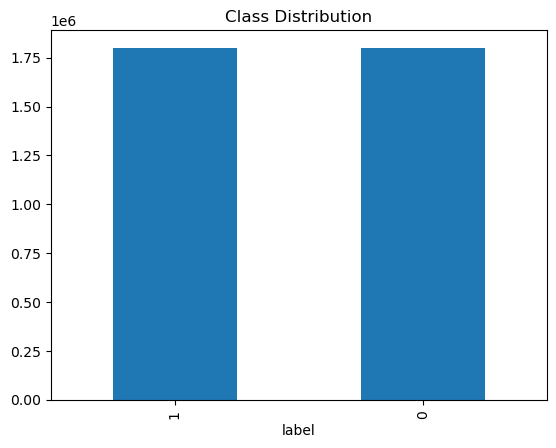

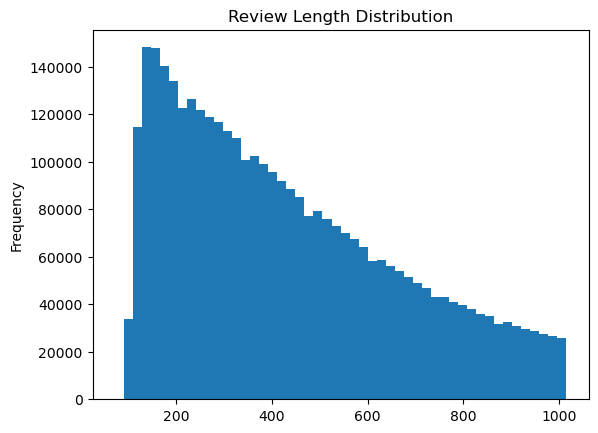

In [2]:
import matplotlib.pyplot as plt

train_df["label"].value_counts().plot(kind = "bar", title = "Class Distribution")
plt.show()

train_df["text_length"] = train_df["text"].apply(len)
train_df['text_length'].plot(kind='hist', bins=50, title='Review Length Distribution')
plt.show()

### Text Preprocessing

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import swifter

# Download only once
nltk.download('stopwords')
nltk.download('wordnet')

# Global resources initialized once
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic chars
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


train_df['cleaned_text'] = train_df['text'].swifter.apply(preprocess)
test_df['cleaned_text'] = test_df['text'].swifter.apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omibu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omibu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Pandas Apply:   0%|          | 0/3600000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/400000 [00:00<?, ?it/s]

### Feature Extraction

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 5000)
x_train = tfidf.fit_transform(train_df["cleaned_text"])
x_test = tfidf.transform(test_df["cleaned_text"])
y_train, y_test = train_df["label"], test_df["label"]

### Model Training

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89    200000
           1       0.89      0.89      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000

Accuracy:  0.8884525


In [7]:
import joblib 
joblib.dump(model, "../models/sentiment_model.pkl")
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")

['../models/tfidf_vectorizer.pkl']